In [17]:
# 📌 TASK: Population Data Visualization | Credora Task 01

# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Plot setup
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


In [18]:
# Load population data (skip metadata rows)
pop_df = pd.read_csv('/content/API_SP.POP.TOTL_DS2_en_csv_v2_85220.csv', skiprows=4)

# Load metadata (if needed later for country info or indicators)
meta_country = pd.read_csv('/content/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_85220.csv')
meta_indicator = pd.read_csv('/content/Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_85220.csv')

# Preview population data
pop_df.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,NaN,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,NaN,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,NaN,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,NaN,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,NaN,NaN


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6095 entries, 0 to 6094
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  6095 non-null   object 
 1   Country Code  6095 non-null   object 
 2   Year          6095 non-null   int64  
 3   Population    6095 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 190.6+ KB


In [33]:


# Describe the three datasets
print("--- Population Data (pop_df) Description ---")
pop_df.info()
print("\n")

print("--- Country Metadata (meta_country) Description ---")
meta_country.info()
print("\n")

print("--- Indicator Metadata (meta_indicator) Description ---")
meta_indicator.info()
print("\n")

# Display basic statistics for numeric columns in pop_df (years)
print("--- Population Data (pop_df) Basic Statistics ---")
print(pop_df.describe())


--- Population Data (pop_df) Description ---
<class 'pandas.core.frame.DataFrame'>
Index: 265 entries, 0 to 265
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  265 non-null    object 
 1   Country Code  265 non-null    object 
 2   2000          265 non-null    float64
 3   2001          265 non-null    float64
 4   2002          265 non-null    float64
 5   2003          265 non-null    float64
 6   2004          265 non-null    float64
 7   2005          265 non-null    float64
 8   2006          265 non-null    float64
 9   2007          265 non-null    float64
 10  2008          265 non-null    float64
 11  2009          265 non-null    float64
 12  2010          265 non-null    float64
 13  2011          265 non-null    float64
 14  2012          265 non-null    float64
 15  2013          265 non-null    float64
 16  2014          265 non-null    float64
 17  2015          265 non-null    flo

In [26]:

pop_df_cleaned = pop_df.dropna()

print("Shape before dropping NaNs:", pop_df.shape)
print("Shape after dropping NaNs:", pop_df_cleaned.shape)

pop_df = pop_df_cleaned

pop_df.head()

Shape before dropping NaNs: (266, 25)
Shape after dropping NaNs: (265, 25)


,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,90588.0,91439.0,92074.0,93128.0,95138.0,97635.0,99405.0,100150.0,...,105675.0,106807.0,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0
1,Africa Eastern and Southern,AFE,406156661.0,416807868.0,427820358.0,439173286.0,450928044.0,463076637.0,475606210.0,488580707.0,...,575202699.0,590968990.0,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0
2,Afghanistan,AFG,20130327.0,20284307.0,21378117.0,22733049.0,23560654.0,24404567.0,25424094.0,25909852.0,...,31622704.0,32792523.0,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0
3,Africa Western and Central,AFW,274968446.0,282780717.0,290841795.0,299142845.0,307725100.0,316588476.0,325663158.0,334984176.0,...,396030207.0,406992047.0,418127845.0,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0
4,Angola,AGO,16194869.0,16747208.0,17327699.0,17943712.0,18600423.0,19291161.0,20015279.0,20778561.0,...,26165620.0,27160769.0,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0


In [27]:
# Keep columns from 2000 to 2022
years = [str(y) for y in range(2000, 2023)]
columns = ['Country Name', 'Country Code'] + years
pop_df = pop_df[columns]

# Convert wide format to long format
df = pop_df.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='Population')

# Drop missing values
df.dropna(inplace=True)
df['Year'] = df['Year'].astype(int)
df['Population'] = df['Population'].astype(float)

# Check data types and head
df.dtypes, df.head()


(Country Name     object
 Country Code     object
 Year              int64
 Population      float64
 dtype: object,
                   Country Name Country Code  Year   Population
 0                        Aruba          ABW  2000      90588.0
 1  Africa Eastern and Southern          AFE  2000  406156661.0
 2                  Afghanistan          AFG  2000   20130327.0
 3   Africa Western and Central          AFW  2000  274968446.0
 4                       Angola          AGO  2000   16194869.0)

<ipython-input-28-4617d377d03e>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




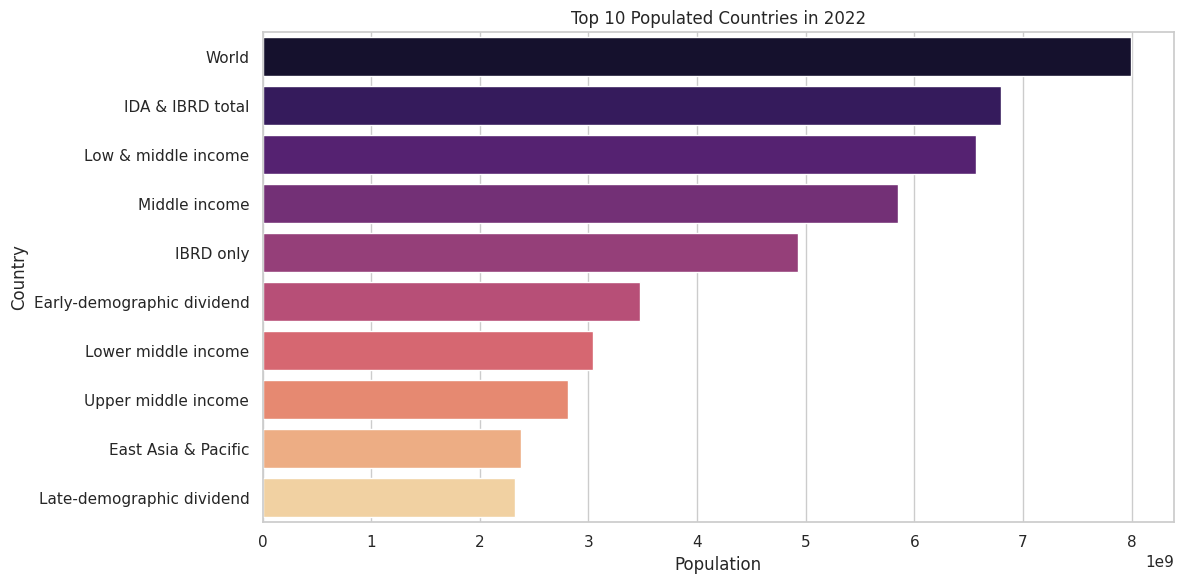

In [28]:
latest_year = 2022
latest_df = df[df['Year'] == latest_year]
top10 = latest_df.sort_values(by='Population', ascending=False).head(10)

sns.barplot(data=top10, y='Country Name', x='Population', palette='magma')
plt.title(f"Top 10 Populated Countries in {latest_year}")
plt.xlabel("Population")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


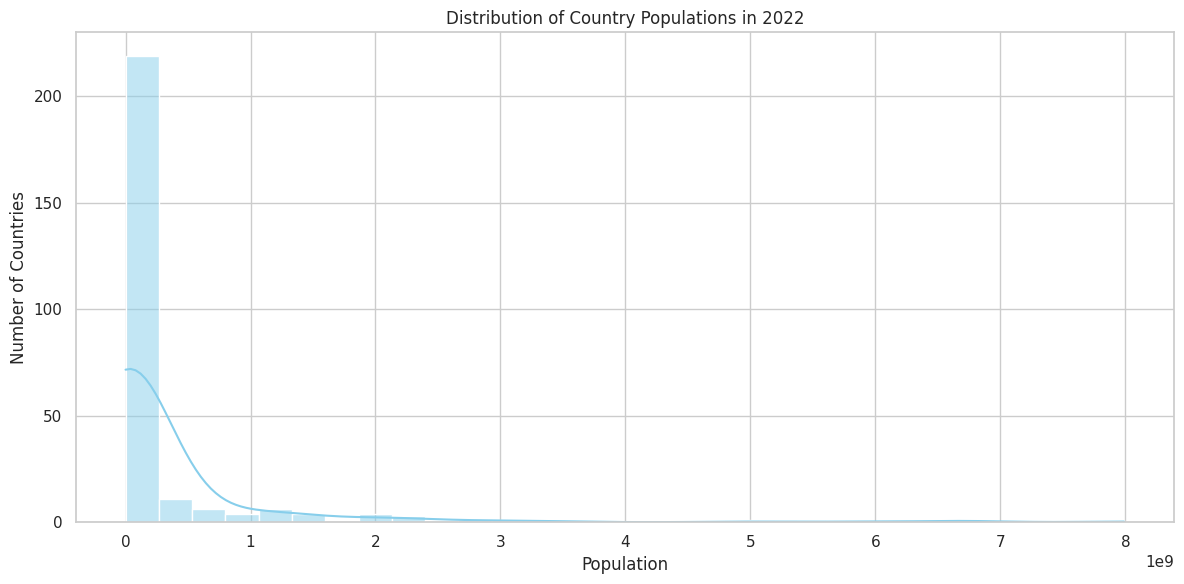

In [29]:
sns.histplot(latest_df['Population'], bins=30, kde=True, color='skyblue')
plt.title(f"Distribution of Country Populations in {latest_year}")
plt.xlabel("Population")
plt.ylabel("Number of Countries")
plt.tight_layout()
plt.show()


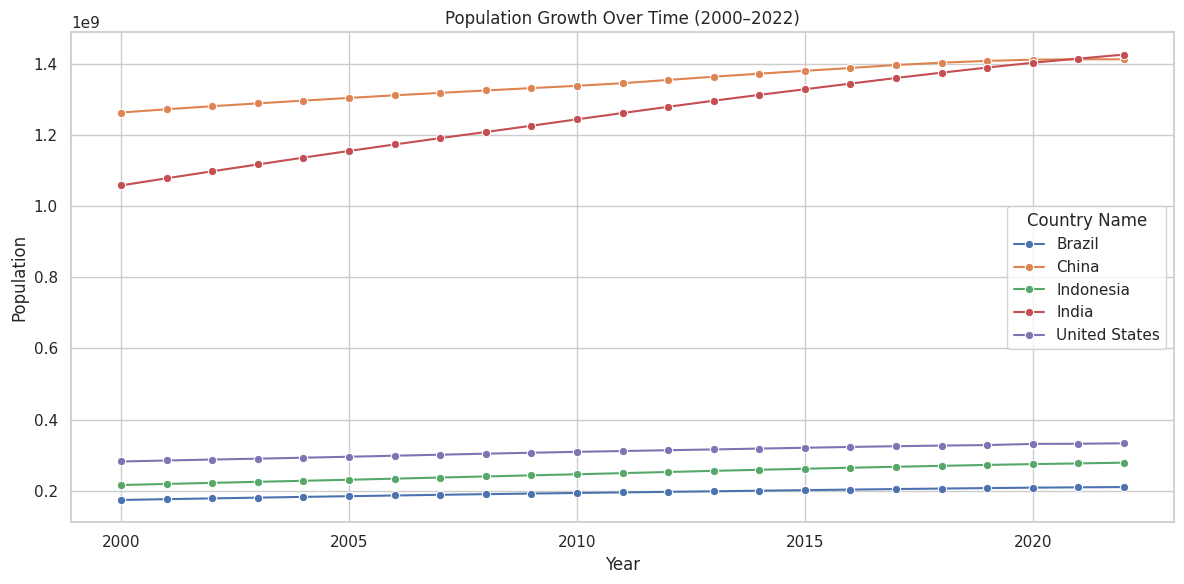

In [30]:
selected_countries = ['India', 'China', 'United States', 'Indonesia', 'Brazil']
df_line = df[df['Country Name'].isin(selected_countries)]

sns.lineplot(data=df_line, x='Year', y='Population', hue='Country Name', marker='o')
plt.title("Population Growth Over Time (2000–2022)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.tight_layout()
plt.show()


In [23]:
fig = px.choropleth(latest_df,
                    locations="Country Name",
                    locationmode="country names",
                    color="Population",
                    hover_name="Country Name",
                    color_continuous_scale="Viridis",
                    title=f"Global Population Distribution by Country ({latest_year})")
fig.show()
